In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [45]:
df=pd.read_csv('McDonald_s_Reviews.csv',encoding='latin-1')
df=pd.DataFrame(df)
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


## Exploratory Data Analysis

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [47]:
df['rating_numeric']=1
for index,row in df.iterrows():
    df['rating_numeric'][index]=int(row['rating'][0])

/var/folders/r2/88whnm8j7qz6mg_k499zyh0m0000gn/T/ipykernel_20995/558269248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_numeric'][index]=int(row['rating'][0])


In [48]:
#dropping irrelevant columns
df.drop(columns=['latitude ','longitude'],inplace=True)

In [49]:
df.isna().sum()

reviewer_id       0
store_name        0
category          0
store_address     0
rating_count      0
review_time       0
review            0
rating            0
rating_numeric    0
dtype: int64

In [50]:
# Setting sentiment metrics as 1:positive, -1:negative, 0:neutral
df['sentiment']=0
for index,rows in df.iterrows():
    if df['rating_numeric'][index]>=4:
        df['sentiment'][index]=1
    elif df['rating_numeric'][index]<=2:
        df['sentiment'][index]=-1
    elif df['rating_numeric'][index]==3:
        df['sentiment'][index]=0
df.head()

/var/folders/r2/88whnm8j7qz6mg_k499zyh0m0000gn/T/ipykernel_20995/1947193740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][index]=-1
/var/folders/r2/88whnm8j7qz6mg_k499zyh0m0000gn/T/ipykernel_20995/1947193740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][index]=1
/var/folders/r2/88whnm8j7qz6mg_k499zyh0m0000gn/T/ipykernel_20995/1947193740.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['

,reviewer_id,store_name,category,store_address,rating_count,review_time,review,rating,rating_numeric,sentiment
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,1,-1
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,4,1
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,1,-1
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,5,1
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,1,-1


<Axes: xlabel='rating', ylabel='Count'>

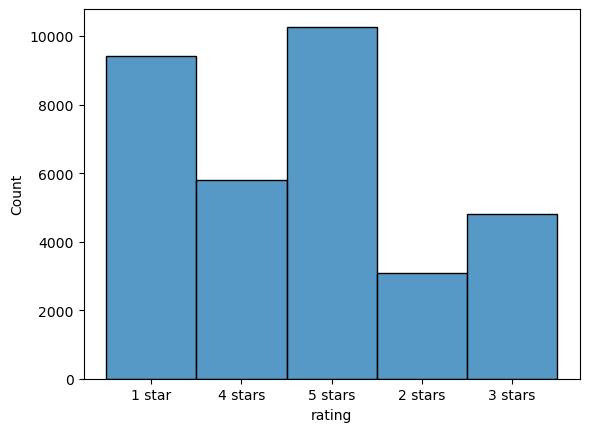

In [51]:
sns.histplot(df.rating)

<Axes: xlabel='sentiment', ylabel='Count'>

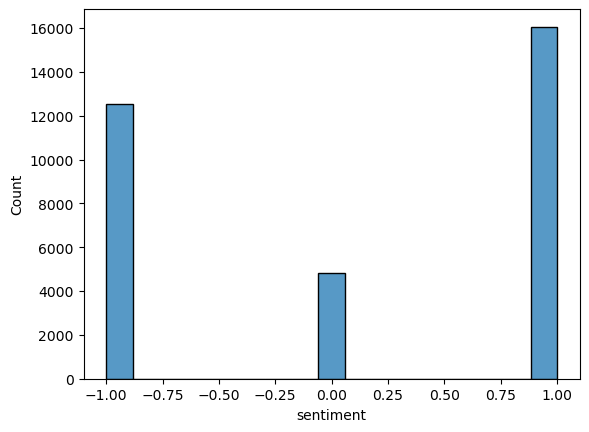

In [52]:
sns.histplot(df.sentiment)

([<matplotlib.patches.Wedge at 0x169f60290>,
 [Text(0.0658760617292821, 1.0980256574830298, '1'),
  Text(-0.5400230001065748, -0.9583189236135821, '-1'),
  Text(0.9889394133358957, -0.48166257561788467, '0')],
 [Text(0.03593239730688114, 0.5989230858998345, '48.1%'),
  Text(-0.29455800005813165, -0.5227194128801357, '37.5%'),
  Text(0.5394214981832158, -0.2627250412461189, '14.4%')])

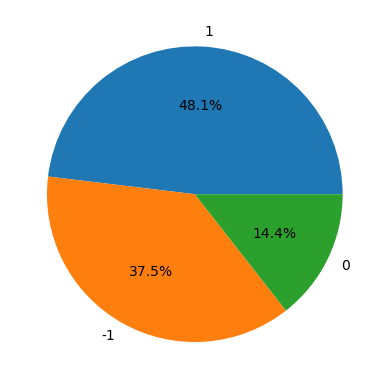

In [53]:
lbl=['1','-1','0']
plt.pie(df.sentiment.value_counts(),labels=lbl,autopct='%1.1f%%')

In [54]:
dfpos=df[df.sentiment==1]
sns.barplot

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)>

<Axes: xlabel='rating', ylabel='Count'>

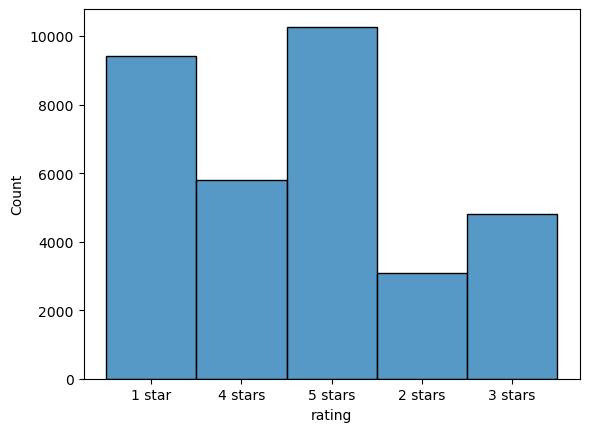

In [55]:
sns.histplot(data=df,x='rating')

In [56]:
df.sentiment.value_counts()

 1    16061
-1    12517
 0     4818
Name: sentiment, dtype: int64

In [57]:
len(df.store_address.unique())

40

In [58]:
#Applying Label Encoder to store address

from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['store_address'])
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [59]:
le_name_mapping = {v: k for k, v in le_name_mapping.items()}
le_name_mapping

{0: '1044 US-11, Champlain, NY 12919, United States',
 1: '10451 Santa Monica Blvd, Los Angeles, CA 90025, United States',
 2: '10901 Riverside Dr, North Hollywood, CA 91602, United States',
 3: '1100 N US Hwy 377, Roanoke, TX 76262, United States',
 4: '111 Madison St, Oak Park, IL 60302, United States',
 5: '1121 Garnet Ave, San Diego, CA 92109, United States',
 6: '11382 US-441, Orlando, FL 32837, United States',
 7: '114 Delancey St, New York, NY 10002, United States',
 8: '13749 US-183 Hwy, Austin, TX 78750, United States',
 9: '1415 E State Rd, Fern Park, FL 32730, United States',
 10: "151 West 34th Street (Macy's 7th Floor, New York, NY 10001, United States",
 11: '1540 2nd St, Santa Monica, CA 90405, United States',
 12: '160 Broadway, New York, NY 10038, United States',
 13: '1650 Washington Ave, Miami Beach, FL 33139, United States',
 14: '1698 US-209, Brodheadsville, PA 18322, United States',
 15: '1916 M St NW, Washington, DC 20036, United States',
 16: '210 5th S, Salt La

In [60]:
df['store_address']= label_encoder.fit_transform(df['store_address']) 
  
df['store_address'].unique() 

array([ 8, 14, 35, 22, 36, 12, 26,  1,  7, 28, 20, 23, 25,  6, 16, 15, 10,
       32, 13,  5,  0, 24, 11, 31, 19,  4, 37,  2, 34,  3, 29, 17, 39, 18,
       27,  9, 38, 33, 30, 21])

In [61]:
#evaluating overall sentiments for each distinct store_address
overall_sentiments=df.groupby(['store_address'])['sentiment'].mean().to_dict()

In [62]:
overall_sentiments

{0: 0.18064516129032257,
 1: 0.3333333333333333,
 2: 0.22631578947368422,
 3: 0.3125,
 4: 0.23435419440745672,
 5: -0.07205882352941176,
 6: 0.10845070422535211,
 7: 0.3333333333333333,
 8: 0.14125,
 9: 0.2917647058823529,
 10: -0.5666666666666667,
 11: 0.1548780487804878,
 12: -0.3333333333333333,
 13: -0.5298245614035088,
 14: 0.29863813229571984,
 15: 0.38088235294117645,
 16: -0.2292134831460674,
 17: 0.18235294117647058,
 18: 0.24848484848484848,
 19: 0.09291338582677165,
 20: 0.10740740740740741,
 21: -0.21210191082802549,
 22: 0.4307017543859649,
 23: 0.01264367816091954,
 24: -0.2494802494802495,
 25: 0.22875,
 26: 0.0,
 27: -0.07848837209302326,
 28: 0.36727272727272725,
 29: 0.020930232558139535,
 30: 0.11333333333333333,
 31: 0.42448979591836733,
 32: 0.07090909090909091,
 33: 0.420265780730897,
 34: 0.37645811240721105,
 35: 0.1824561403508772,
 36: 0.2149122807017544,
 37: -0.1447084233261339,
 38: -0.20582010582010582,
 39: 0.007766990291262136}

In [63]:
max(overall_sentiments.items(), key=lambda x: x[1])

(22, 0.4307017543859649)

In [64]:
min(overall_sentiments.items(), key=lambda x: x[1])

(10, -0.5666666666666667)

In [65]:
#finding the original of store_address for most & least popular stores
print("The most popular store with most positive ratings is")
print(le_name_mapping[22])

print("The least popular store with most negative ratings is")
print(le_name_mapping[10])

The most popular store with most positive ratings is
429 7th Ave, New York, NY 10001, United States
The least popular store with most negative ratings is
151 West 34th Street (Macy's 7th Floor, New York, NY 10001, United States


In [66]:
#dropping irrelevant columns
df.drop(columns=['reviewer_id','store_name','category','rating'],inplace=True)

In [67]:
df.columns

Index(['store_address', 'rating_count', 'review_time', 'review',
       'rating_numeric', 'sentiment'],
      dtype='object')

In [68]:
dataset=df.drop(columns=['store_address','rating_count','review_time'])
dataset

,review,rating_numeric,sentiment
0,Why does it look like someone spit on my food?...,1,-1
1,It'd McDonalds. It is what it is as far as the...,4,1
2,Made a mobile order got to the speaker and che...,1,-1
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,1
4,"I repeat my order 3 times in the drive thru, a...",1,-1
...,...,...,...
33391,They treated me very badly.,1,-1
33392,The service is very good,5,1
33393,To remove hunger is enough,4,1
33394,"It's good, but lately it has become very expen...",5,1


## nltk sentiment analyzer

In [69]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [70]:
dataset['pos']=0
dataset['neg']=0
dataset['neu']=0

In [71]:
for ind in df.index:
    review=dataset['review'][ind]
    dataset['pos'][ind] = sia.polarity_scores(review)['pos']
    dataset['neg'][ind] = sia.polarity_scores(review)['neg']
    dataset['neu'][ind] = sia.polarity_scores(review)['neu']

/var/folders/r2/88whnm8j7qz6mg_k499zyh0m0000gn/T/ipykernel_20995/1689287078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['pos'][ind] = sia.polarity_scores(review)['pos']
/var/folders/r2/88whnm8j7qz6mg_k499zyh0m0000gn/T/ipykernel_20995/1689287078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['neg'][ind] = sia.polarity_scores(review)['neg']
/var/folders/r2/88whnm8j7qz6mg_k499zyh0m0000gn/T/ipykernel_20995/1689287078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [72]:
dataset.head()

,review,rating_numeric,sentiment,pos,neg,neu
0,Why does it look like someone spit on my food?...,1,-1,0.094,0.027,0.879
1,It'd McDonalds. It is what it is as far as the...,4,1,0.209,0.000,0.791
2,Made a mobile order got to the speaker and che...,1,-1,0.000,0.051,0.949
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,1,0.000,0.000,1.000
4,"I repeat my order 3 times in the drive thru, a...",1,-1,0.000,0.143,0.857


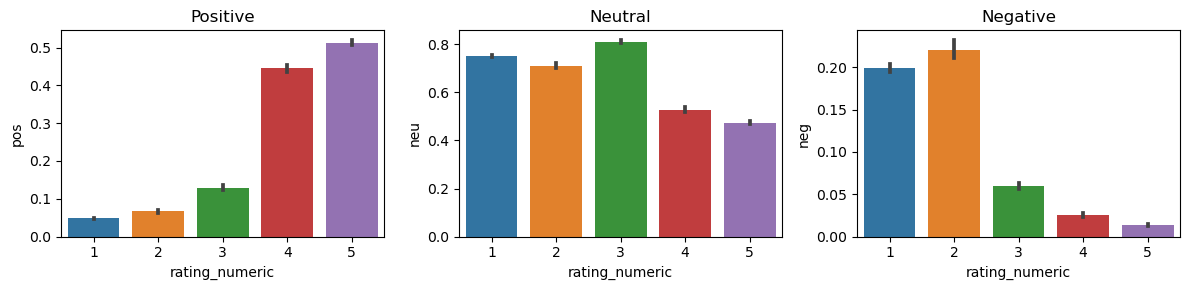

In [73]:
fig, axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=dataset, x='rating_numeric',y='pos',ax=axs[0])
sns.barplot(data=dataset, x='rating_numeric',y='neu',ax=axs[1])
sns.barplot(data=dataset, x='rating_numeric',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [74]:
#dropping all other columns other than the review sentence and true sentiment
dataset=dataset.drop(columns=['pos','neg','neu','rating_numeric'])
dataset

,review,sentiment
0,Why does it look like someone spit on my food?...,-1
1,It'd McDonalds. It is what it is as far as the...,1
2,Made a mobile order got to the speaker and che...,-1
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,1
4,"I repeat my order 3 times in the drive thru, a...",-1
...,...,...
33391,They treated me very badly.,-1
33392,The service is very good,1
33393,To remove hunger is enough,1
33394,"It's good, but lately it has become very expen...",1


## Data Preprocessing

In [75]:
# library to clean data
import re 
 
# Natural Language Tool Kit
import nltk 
 
nltk.download('stopwords')
 
# to remove stopword
from nltk.corpus import stopwords
 
# for Stemming propose 
from nltk.stem.porter import PorterStemmer
 
# Initialize empty array
# to append clean text 
corpus = [] 
 
# 1000 (reviews) rows to clean
for i in range(0, 33396): 
     
    # column : "Review", row ith
    review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i]) 
     
    # convert all cases to lower cases
    review = review.lower() 
     
    # split to array(default delimiter is " ")
    review = review.split() 
     
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer() 
     
    # loop for stemming each word
    # in string array at ith row    
    review = [ps.stem(word) for word in review
                if not word in set(stopwords.words('english'))] 
                 
    # rejoin all string array elements
    # to create back into a string
    review = ' '.join(review)  
     
    # append each string to create
    # array of clean text 
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/baibhavdatta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
allwords = ','.join(word for word in corpus)

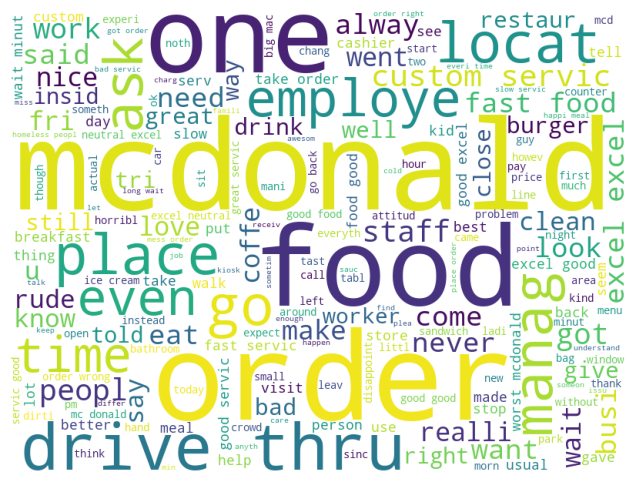

In [103]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    width = 800,
    height = 600,
    background_color = 'white').generate(allwords)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [76]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
 
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500) 
 
# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray() 
 
# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values

## Splitting the data into train and test sets

In [77]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split
 
# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Random Forest Classification

In [107]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier
 
# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results 
model = RandomForestClassifier(n_estimators = 501,
                            criterion = 'entropy')
                             
model.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=501)

In [108]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 83.60%


In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.83      0.90      0.86      3127
           0       0.78      0.42      0.54      1158
           1       0.85      0.91      0.88      4064

    accuracy                           0.84      8349
   macro avg       0.82      0.74      0.76      8349
weighted avg       0.83      0.84      0.83      8349



## Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

/Users/baibhavdatta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [111]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.12%


In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.84      0.84      0.84      3127
           0       0.63      0.35      0.45      1158
           1       0.82      0.92      0.86      4064

    accuracy                           0.81      8349
   macro avg       0.76      0.70      0.72      8349
weighted avg       0.80      0.81      0.80      8349



## Support Vector Machine

In [113]:
# import support vector classifier 
# "Support Vector Classifier"
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
 
# fitting x samples and y classes 
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [114]:
# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.14%


In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.83      0.85      0.84      3127
           0       0.63      0.35      0.45      1158
           1       0.82      0.92      0.87      4064

    accuracy                           0.81      8349
   macro avg       0.76      0.70      0.72      8349
weighted avg       0.80      0.81      0.80      8349



## KNN Classifier

In [116]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 

In [117]:
# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 74.03%


In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.81      0.70      0.75      3127
           0       0.48      0.37      0.42      1158
           1       0.75      0.88      0.81      4064

    accuracy                           0.74      8349
   macro avg       0.68      0.65      0.66      8349
weighted avg       0.74      0.74      0.73      8349

